In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipaddress import ip_address
credit_df = pd.read_csv(r'C:\Users\Amenzz\Desktop\week8\data\creditcard.csv')
fraud_df = pd.read_csv(r'C:\Users\Amenzz\Desktop\week8\data\Fraud_Data.csv')
ip_df =  pd.read_csv(r'C:\Users\Amenzz\Desktop\week8\data\IpAddress_to_Country.csv')
# Check missing values
print("Missing values:\n", fraud_df.isnull().sum())
print(fraud_df.columns)

# Drop rows with missing values (you can also impute if appropriate)
fraud_df.dropna(inplace=True)


Missing values:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')


In [12]:
# Remove duplicates
fraud_df.drop_duplicates(inplace=True)

# Convert datetime columns
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Convert categorical types
fraud_df['sex'] = fraud_df['sex'].astype('category')
fraud_df['source'] = fraud_df['source'].astype('category')
fraud_df['browser'] = fraud_df['browser'].astype('category')


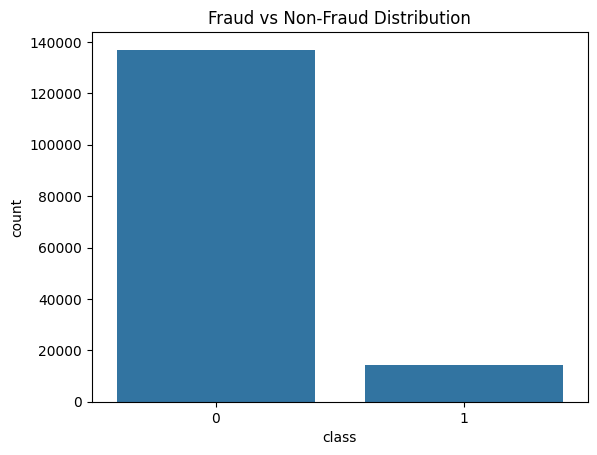

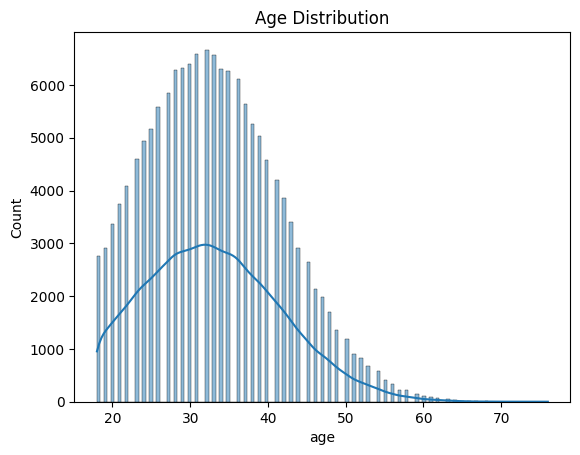

In [13]:
# Class distribution
sns.countplot(x='class', data=fraud_df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

# Age distribution
sns.histplot(fraud_df['age'], kde=True)
plt.title("Age Distribution")
plt.show()


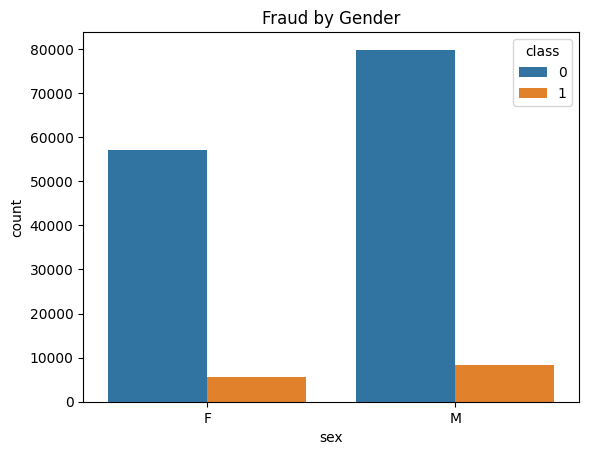

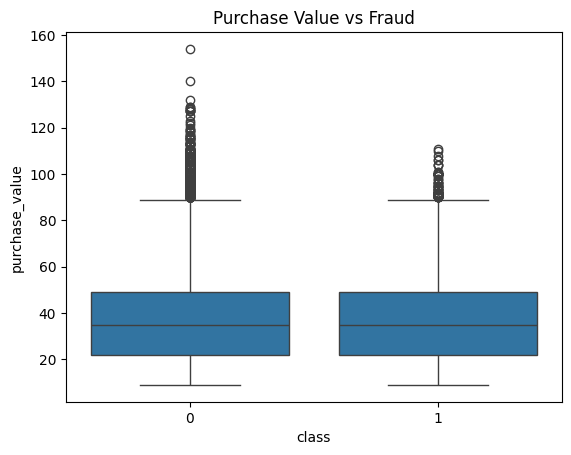

In [14]:
# Fraud by gender
sns.countplot(x='sex', hue='class', data=fraud_df)
plt.title("Fraud by Gender")
plt.show()

# Purchase value by fraud status
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title("Purchase Value vs Fraud")
plt.show()


In [29]:
def ip_to_int(ip_str):
    try:
        return int(ip_address(ip_str))
    except:
        return np.nan
print(ip_df.columns)

fraud_df.dropna(subset=['ip_int'], inplace=True)
ip_df.dropna(inplace=True)
ip_df.drop_duplicates(inplace=True)

ip_df = ip_df.sort_values('lower_bound_ip_int')
fraud_df = fraud_df.sort_values('ip_int')

ip_right = ip_df[['lower_bound_ip_int', 'upper_bound_ip_int', 'country']].rename(
    columns={
        'lower_bound_ip_int': 'ip_lower_bound',
        'upper_bound_ip_int': 'ip_upper_bound',
        'country': 'ip_country'
    }
)

fraud_df = pd.merge_asof(
    fraud_df,
    ip_right,
    left_on='ip_int',
    right_on='ip_lower_bound',
    direction='backward'
)

fraud_df = fraud_df[fraud_df['ip_int'] <= fraud_df['ip_upper_bound']]


Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country',
       'lower_bound_ip_int', 'upper_bound_ip_int'],
      dtype='object')
